In [1]:
from datasets import Dataset, DatasetDict
from tqdm import tqdm
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import wandb
api = wandb.Api()

/home/hua2bv/miniconda3/envs/unlearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# project_names = ["Composable_Interventions", "AK_Tests"]
project_names = ["dri-ice/Composable_Interventions"]
all_runs_frame = None
for project_name in project_names:
    runs = api.runs(project_name)
    for run in tqdm(runs, desc=f"Loading runs for project: {project_name}"):
        if run.state != "finished":
            continue

        skip_tags = ["test", "hparam_search", "none"]
        should_skip = False
        for tag in skip_tags:
            if tag in run.config["tag"].lower():
                should_skip = True
        
        if should_skip:
            continue

        try:
            run_start_datetime = datetime.fromtimestamp(run.summary_metrics["_timestamp"])
            start_cutoff = datetime.strptime("2024-05-1 12:00:00", "%Y-%m-%d %H:%M:%S")
            if run_start_datetime < start_cutoff:
                continue

            config_frame = pd.DataFrame([run.config])
            summary_frame = pd.DataFrame([run.summary_metrics])
            combined_frame = pd.concat([config_frame, summary_frame], axis=1)
            if all_runs_frame is None:
                all_runs_frame = combined_frame
            else:
                all_runs_frame = pd.concat([all_runs_frame, combined_frame])
        except:
            print(f"Failed to load run {run.id}")
            continue

    all_runs_frame = all_runs_frame.sort_values("_timestamp", ascending=False)
    for column in all_runs_frame.columns:
        all_runs_frame[column] = all_runs_frame[column].apply(lambda x: str(x) if isinstance(x, dict) or isinstance(x, list) else x)

all_runs_frame

Loading runs for project: dri-ice/Composable_Interventions:  61%|██████    | 80/131 [00:02<00:01, 34.40it/s]

Failed to load run n0iel6ok
Failed to load run xr5mede5
Failed to load run 27f8pxs0


Loading runs for project: dri-ice/Composable_Interventions: 100%|██████████| 131/131 [00:04<00:00, 29.03it/s]


,lr,sym,tag,edit,rank,save,seed,dtype,wandb,wbits,...,rmu_layer_id,rmu_layer_ids,rmu_param_ids,rmu_batch_size,unlearn_method,rmu_forget_corpora,rmu_retain_corpora,rmu_steering_coeffs,wandb_entity,wandb_project
0,0.00500,True,GPTQ4bit-to-lora,lora,8.0,out/,0,torch.float16,online,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00500,True,GPTQ2bit-to-lora,lora,8.0,out/,0,torch.float16,online,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00500,True,GPTQ8bit-to-lora,lora,8.0,out/,0,torch.float16,online,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,GPTQ4bit-to-ft,ft,NaN,out/,0,torch.float16,online,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,GPTQ8bit-to-ft,ft,NaN,out/,0,torch.float16,online,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,True,Compress_AWQ2bit,none,NaN,out/,0,torch.float16,online,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_AWQ8bit,none,NaN,out/,0,torch.float16,online,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_AWQ4bit,none,NaN,out/,0,torch.float16,online,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_AWQ2bit,none,NaN,out/,0,torch.float16,online,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
all_runs_frame["edit_set"].value_counts()

edit_set
50    71
1     25
Name: count, dtype: int64

In [12]:
list(all_runs_frame.columns)

['lr',
 'sym',
 'tag',
 'edit',
 'rank',
 'save',
 'seed',
 'dtype',
 'wandb',
 'wbits',
 'device',
 'method',
 'dataset',
 'nearest',
 'unlearn',
 'alg_name',
 'compress',
 'edit_set',
 'new_eval',
 'nsamples',
 'percdamp',
 'act_order',
 'ckpt_path',
 'groupsize',
 'kl_factor',
 'load_ckpt',
 'lora_type',
 'num_steps',
 'save_ckpt',
 'stats_dir',
 'batch_size',
 'lora_alpha',
 'max_length',
 'model_name',
 'save_model',
 'zero_point',
 'compression',
 'use_variant',
 'edit_dataset',
 'lora_dropout',
 'quant_method',
 'weight_decay',
 'interventions',
 'static_groups',
 'eval_zero_shot',
 'model_parallel',
 'sparsity_ratio',
 'target_modules',
 'norm_constraint',
 'number_of_edits',
 'true_sequential',
 'compression_dataset',
 'rmu_max_num_batches',
 'qa_question_count_limit',
 'PPl QA',
 'Latency',
 'Metrics',
 'PPL',
 'Success recall',
 'wmdp_cyber accuracy',
 '_step',
 '_wandb',
 '_runtime',
 'Average bits',
 'mmlu accuracy',
 'Rewrite accuracy',
 'PPl edits unmasked',
 'Generaliza

In [18]:
# # Drop duplicate experiments, keep the most recent
# all_runs_frame = all_runs_frame.drop_duplicates(subset=[col for col in all_runs_frame.columns if col not in ["tag", "Metrics"] and not col.startswith("_")])
# all_runs_frame

all_runs_frame.drop_duplicates(subset=[col for col in all_runs_frame.columns if col not in ["tag", "Metrics", "edit_set"] and not col.startswith("_")])

,lr,sym,tag,edit,rank,save,seed,dtype,wandb,wbits,...,rmu_layer_id,rmu_layer_ids,rmu_param_ids,rmu_batch_size,unlearn_method,rmu_forget_corpora,rmu_retain_corpora,rmu_steering_coeffs,wandb_entity,wandb_project
0,0.00500,True,GPTQ4bit-to-lora,lora,8.0,out/,0,torch.float16,online,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00500,True,GPTQ2bit-to-lora,lora,8.0,out/,0,torch.float16,online,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00500,True,GPTQ8bit-to-lora,lora,8.0,out/,0,torch.float16,online,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,GPTQ4bit-to-ft,ft,NaN,out/,0,torch.float16,online,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.00005,True,GPTQ8bit-to-ft,ft,NaN,out/,0,torch.float16,online,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,True,Compress_AWQ2bit,none,NaN,out/,0,torch.float16,online,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_AWQ8bit,none,NaN,out/,0,torch.float16,online,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_AWQ4bit,none,NaN,out/,0,torch.float16,online,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,True,Compress_AWQ2bit,none,NaN,out/,0,torch.float16,online,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# ["lr", "tag", "edit", "rank", "save", "seed", "dtype", "wandb", "device", "method", "rmu_lr", "dataset", "unlearn", "alg_name", "compress", "edit_set", "rmu_seed", "ckpt_path", "kl_factor", "load_ckpt", "lora_type", "num_steps", "rmu_alpha", "save_ckpt", "stats_dir", "batch_size", "lora_alpha", "max_length", "model_name", "save_model", "compression", "rmu_max_len", "rmu_min_len", "edit_dataset", "lora_dropout", "rmu_layer_id", "weight_decay", "interventions", "rmu_layer_ids", "rmu_param_ids", "eval_zero_shot", "model_parallel", "rmu_batch_size", "sparsity_ratio", "target_modules", "unlearn_method", "norm_constraint", "number_of_edits", "rmu_forget_corpora", "rmu_retain_corpora", "compression_dataset", "rmu_max_num_batches", "rmu_steering_coeffs", "PPL edits", "wmdp_cyber", "wmdp_bio accuracy", "mmlu stderr", "Local recall", "wmdp_cyber accuracy", "Success recall", "FLOPs", "Locality", "wmdp_bio", "mmlu accuracy", "PPl edits unmasked", "Generalization recall", "Metrics", "_step", "Average bits", "mmlu", "_wandb", "_runtime", "Rewrite accuracy", "PPL", "Latency", "PPl QA", "Generalization", "wmdp_bio stderr", "wmdp_cyber stderr", "_timestamp", "ln_f_module", "lm_head_module", "mlp_module_tmp", "attn_module_tmp", "layer_module_tmp", "rewrite_module_tmp", "objective_optimization", "sym", "wbits", "nearest", "new_eval", "nsamples", "percdamp", "act_order", "groupsize", "zero_point", "use_variant", "prune_method", "sparsity_type", "static_groups", "true_sequential"]

In [5]:
all_runs_frame["interventions"].value_counts()

interventions
['compress']               30
['compress', 'edit']       21
['compress', 'unlearn']    12
['unlearn', 'compress']    12
['edit', 'compress']       12
['edit']                    3
['edit', 'unlearn']         3
['unlearn', 'edit']         3
Name: count, dtype: int64

In [6]:
# ['compress', 'unlearn']
# get all cases where compress then unlearn
all_runs_frame[(all_runs_frame["interventions"] == "['compress', 'unlearn']") & (all_runs_frame["compression"] == "wanda")]

,lr,sym,tag,edit,rank,save,seed,dtype,wandb,wbits,...,rmu_layer_id,rmu_layer_ids,rmu_param_ids,rmu_batch_size,unlearn_method,rmu_forget_corpora,rmu_retain_corpora,rmu_steering_coeffs,wandb_entity,wandb_project
0,NaN,True,wanda0.65\%-rmu,none,NaN,out/,0,torch.bfloat16,online,4,...,5.0,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions
0,NaN,True,wanda0.45\%-rmu,none,NaN,out/,0,torch.bfloat16,online,4,...,5.0,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions
0,NaN,True,wanda0.25\%-rmu,none,NaN,out/,0,torch.bfloat16,online,4,...,5.0,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions


/tmp/ipykernel_977769/643714344.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wanda_then_rmu_frame["plot_tag"] = "Wanda->RMU"
/tmp/ipykernel_977769/643714344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wanda_then_rmu_frame["plot_tag"] = "Wanda->RMU"


,lr,sym,tag,edit,rank,save,seed,dtype,wandb,wbits,...,rmu_layer_ids,rmu_param_ids,rmu_batch_size,unlearn_method,rmu_forget_corpora,rmu_retain_corpora,rmu_steering_coeffs,wandb_entity,wandb_project,plot_tag
0,NaN,True,wanda0.65\%-rmu,none,NaN,out/,0,torch.bfloat16,online,4,...,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions,Wanda->RMU
0,NaN,True,wanda0.45\%-rmu,none,NaN,out/,0,torch.bfloat16,online,4,...,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions,Wanda->RMU
0,NaN,True,wanda0.25\%-rmu,none,NaN,out/,0,torch.bfloat16,online,4,...,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions,Wanda->RMU


/tmp/ipykernel_977769/643714344.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rmu_then_wanda_frame["plot_tag"] = "RMU->Wanda"
/tmp/ipykernel_977769/643714344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmu_then_wanda_frame["plot_tag"] = "RMU->Wanda"


,lr,sym,tag,edit,rank,save,seed,dtype,wandb,wbits,...,rmu_layer_ids,rmu_param_ids,rmu_batch_size,unlearn_method,rmu_forget_corpora,rmu_retain_corpora,rmu_steering_coeffs,wandb_entity,wandb_project,plot_tag
0,NaN,True,rmu-wanda0.65\%,none,NaN,out/,0,torch.bfloat16,online,4,...,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions,RMU->Wanda
0,NaN,True,rmu-wanda0.45\%,none,NaN,out/,0,torch.bfloat16,online,4,...,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions,RMU->Wanda
0,NaN,True,rmu-wanda0.25\%,none,NaN,out/,0,torch.bfloat16,online,4,...,"[3, 4, 5]",[5],4.0,rmu,"['bio-forget-corpus', 'cyber-forget-corpus']","['wikitext', 'wikitext']","[20, 20]",dri-ice,Composable_Interventions,RMU->Wanda


<Axes: xlabel='sparsity_ratio', ylabel='mmlu accuracy'>

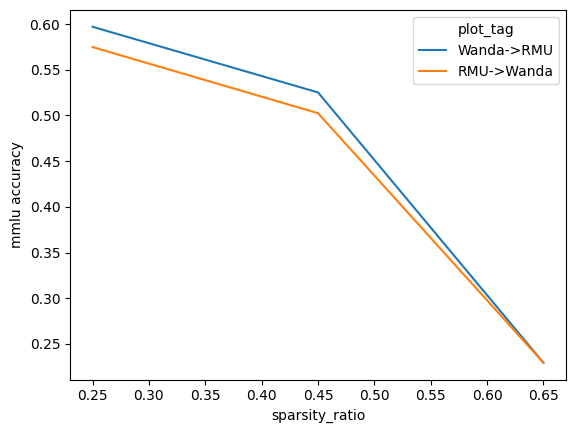

In [7]:
wanda_then_rmu_frame = all_runs_frame[(all_runs_frame["interventions"] == "['compress', 'unlearn']") & (all_runs_frame["compression"] == "wanda")]
wanda_then_rmu_frame["plot_tag"] = "Wanda->RMU"
display(wanda_then_rmu_frame)

rmu_then_wanda_frame = all_runs_frame[(all_runs_frame["interventions"] == "['unlearn', 'compress']") & (all_runs_frame["compression"] == "wanda")]
rmu_then_wanda_frame["plot_tag"] = "RMU->Wanda"
display(rmu_then_wanda_frame)

combined_plot_frame = pd.concat([wanda_then_rmu_frame, rmu_then_wanda_frame])

# create a line plot of the two where the x axis is sparsity and the y axis is accuracy
fig, ax = plt.subplots()
sns.lineplot(data=combined_plot_frame, x="sparsity_ratio", y="mmlu accuracy", hue="plot_tag", ax=ax)

